Contents

01 Import Libraries and Data

02 Assess Values for Variables

03 Create Flags for Marital and Parental Status

04 Create Income Level Flag

05 Create Age Groups

06 Aggregate Age and Parental Status

07 Aggregate Income and Parental Status

08 Aggregate Age and Income

09 Visualize Profile Distribution: Parental Status, Age, and Income

10 Identify Mean, Minimum, and Maximum for Aggregated Groups

11 Add Product Categories to Dataframe

12 Visualize Product Type Orders by Demographic

13 Visualize Mean Spend per Department for Segmented Groups

14 Create Additional Visualizations for Key Questions

15 Edit Visualizations for Readability

16 Create Final Visualizations to Complete Analysis

01 Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [5]:
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis'

In [6]:
df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_excluded.pkl'))

In [7]:
#check output
df_excluded.shape

(30964564, 32)

In [8]:
list(df_excluded.columns)

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'Busiest Days',
 'busiest_period_of_day',
 'price_range_loc',
 'max_order',
 'loyalty_flag',
 'mean_spend',
 'spending_flag',
 'buy_freq',
 'frequency_flag',
 'Gender',
 'State',
 'Age',
 'Date_joined',
 'Number_of_dependents',
 'Marital_status',
 'Income',
 'region',
 'activity_lev']

In [9]:
df_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,Gender,State,Age,Date_joined,Number_of_dependents,Marital_status,Income,region,activity_lev
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,High activity
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,High activity
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,High activity


02 Assess variable values

In [11]:
df_excluded['Marital_status'].value_counts(dropna = False)

Marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [12]:
df_excluded['Number_of_dependents'].value_counts(dropna = False)

Number_of_dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [13]:
df_excluded['Gender'].value_counts(dropna = False)

Gender
Male      15586740
Female    15377824
Name: count, dtype: int64

03 Create Flags for Marital and Parental Status

In [15]:
#create flag for married vs not married
result = []

for value in df_excluded['Marital_status']:
    if value == 'married':
        result.append('married')
    else:
        result.append('not married')

In [16]:
df_excluded['married_yes_no'] = result

In [17]:
df_excluded['married_yes_no'].value_counts(dropna = False)

married_yes_no
married        21743711
not married     9220853
Name: count, dtype: int64

In [18]:
#create flag for parent vs non parent
result = []

for value in df_excluded['Number_of_dependents']:
    if value == 0:
        result.append('non-parent')
    else:
        result.append('parent')

In [19]:
df_excluded['Parental status'] = result

In [20]:
df_excluded['Parental status'].value_counts(dropna = False)

Parental status
parent        23224883
non-parent     7739681
Name: count, dtype: int64

04 Create Income Level Flag

In [22]:
#create a flag for low income
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['Income'] < 17500), 'income_level'] = 'Low income'

In [23]:
#create a flag for low income with kids
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['Income'] < 34500), 'income_level'] = 'Low income'

In [24]:
#flag middle income
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['Income'] >= 34500), 'income_level'] = 'Middle income'

In [25]:
#create a flag for middle income no kids
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['Income'] >= 17500), 'income_level'] = 'Middle income'

In [26]:
#create a flag for high income
df_excluded.loc[(df_excluded['Number_of_dependents'] >= 0) & (df_excluded['Income'] > 167639), 'income_level'] = 'High income'

In [27]:
#check output
df_excluded['income_level'].value_counts(dropna = False)

income_level
Middle income    29626220
High income        726563
Low income         611781
Name: count, dtype: int64

05 Create Age Groups

In [29]:
#check values for age
df_excluded['Age'].agg(['min', 'max'])

min    18
max    81
Name: Age, dtype: int64

In [30]:
#flag age groups
def age_group(row):

    if row['Age'] < 30:
        return 'Young adult'
    elif row['Age']  >= 65:
        return 'Senior citizen'
    else: return 'Adult'

In [31]:
df_excluded['age_category'] = df_excluded.apply(age_group, axis=1)

In [32]:
#check output
df_excluded['age_category'].value_counts(dropna = False)

age_category
Adult             16951417
Senior citizen     8195544
Young adult        5817603
Name: count, dtype: int64

06 Aggregate Age and Parental Status

In [34]:
#flag young parent
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['age_category'] == 'Young adult'), 'parent_status_by_age'] = 'Young parent'

In [35]:
#young non parent
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['age_category'] == 'Young adult'), 'parent_status_by_age'] = 'Young non-parent'

In [36]:
#adult non-parents
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['age_category'] == 'Adult'), 'parent_status_by_age'] = 'Adult Non-parent'

In [37]:
#adult parents
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['age_category'] == 'Adult'), 'parent_status_by_age'] = 'Adult Parent'

In [38]:
#senior parents
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['age_category'] == 'Senior citizen'), 'parent_status_by_age'] = 'Older Parent'

In [39]:
#senior non-parents
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['age_category'] == 'Senior citizen'), 'parent_status_by_age'] = 'Older Non-Parent'

In [40]:
#check output
df_excluded['parent_status_by_age'].value_counts(dropna = False)

parent_status_by_age
Adult Parent        12681312
Older Parent         6173586
Young parent         4369985
Adult Non-parent     4270105
Older Non-Parent     2021958
Young non-parent     1447618
Name: count, dtype: int64

07 Aggregate Income and Parental Status

In [42]:
#flag low income parent
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['income_level'] == 'Low income'), 'Family income'] = 'Low-income parent'

In [43]:
#flag middle income parent
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['income_level'] == 'Middle income'), 'Family income'] = 'Middle-income parent'

In [44]:
#flag high income parent
df_excluded.loc[(df_excluded['Number_of_dependents'] > 0) & (df_excluded['income_level'] == 'High income'), 'Family income'] = 'High-income parent'

In [45]:
#check output
df_excluded['Family income'].value_counts(dropna = False)

Family income
Middle-income parent    22070176
NaN                      7739681
Low-income parent         611781
High-income parent        542926
Name: count, dtype: int64

In [46]:
#flag low income non-parent
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['income_level'] == 'Low income'), 'Family income'] = 'Low-income non-parent'

In [47]:
#flag middle income non-parent
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['income_level'] == 'Middle income'), 'Family income'] = 'Middle-income non-parent'

In [48]:
#flag high income non-parent
df_excluded.loc[(df_excluded['Number_of_dependents'] == 0) & (df_excluded['income_level'] == 'High income'), 'Family income'] = 'High-income non-parent'

In [49]:
#check output
df_excluded['Family income'].value_counts(dropna = False)

Family income
Middle-income parent        22070176
Middle-income non-parent     7556044
Low-income parent             611781
High-income parent            542926
High-income non-parent        183637
Name: count, dtype: int64

08 Aggregate Age, Income, Marital Status

In [51]:
#flag low income young
df_excluded.loc[(df_excluded['age_category'] == 'Young adult') & (df_excluded['income_level'] == 'Low income'), 'Income by age'] = 'Low-income young adult'

In [52]:
#flag middle income young
df_excluded.loc[(df_excluded['age_category'] == 'Young adult') & (df_excluded['income_level'] == 'Middle income'), 'Income by age'] = 'Middle-income young adult'

In [53]:
#flag high income young
df_excluded.loc[(df_excluded['age_category'] == 'Young adult') & (df_excluded['income_level'] == 'High income'), 'Income by age'] = 'High-income young adult'

In [54]:
#flag low income adult
df_excluded.loc[(df_excluded['age_category'] == 'Adult') & (df_excluded['income_level'] == 'Low income'), 'Income by age'] = 'Low-income adult'

In [55]:
#flag middle income adult
df_excluded.loc[(df_excluded['age_category'] == 'Adult') & (df_excluded['income_level'] == 'Middle income'), 'Income by age'] = 'Middle-income adult'

In [56]:
#flag high income adult
df_excluded.loc[(df_excluded['age_category'] == 'Adult') & (df_excluded['income_level'] == 'High income'), 'Income by age'] = 'High-income adult'

In [57]:
#flag low income senior
df_excluded.loc[(df_excluded['age_category'] == 'Senior citizen') & (df_excluded['income_level'] == 'Low income'), 'Income by age'] = 'Low-income senior'

In [58]:
#flag mid income senior
df_excluded.loc[(df_excluded['age_category'] == 'Senior citizen') & (df_excluded['income_level'] == 'Middle income'), 'Income by age'] = 'Middle-income senior'

In [59]:
#flag high income senior
df_excluded.loc[(df_excluded['age_category'] == 'Senior citizen') & (df_excluded['income_level'] == 'High income'), 'Income by age'] = 'High-income senior'

In [60]:
#check output
df_excluded['Income by age'].value_counts(dropna = False)

Income by age
Middle-income adult          16212248
Middle-income senior          7806347
Middle-income young adult     5607625
High-income adult              425847
Low-income adult               313322
High-income senior             263499
Low-income young adult         172761
Low-income senior              125698
High-income young adult         37217
Name: count, dtype: int64

In [61]:
#flag low income married
df_excluded.loc[(df_excluded['married_yes_no'] == 'married') & (df_excluded['income_level'] == 'Low income'), 'marital_income'] = 'Low-income married'

In [62]:
#flag low income unmarried
df_excluded.loc[(df_excluded['married_yes_no'] == 'not married') & (df_excluded['income_level'] == 'Low income'), 'marital_income'] = 'Low-income unmarried'

In [63]:
#flag middle income married
df_excluded.loc[(df_excluded['married_yes_no'] == 'married') & (df_excluded['income_level'] == 'Middle income'), 'marital_income'] = 'Middle-income married'

In [64]:
#flag middle income unmarried
df_excluded.loc[(df_excluded['married_yes_no'] == 'not married') & (df_excluded['income_level'] == 'Middle income'), 'marital_income'] = 'Middle-income unmarried'

In [65]:
#flag high income married
df_excluded.loc[(df_excluded['married_yes_no'] == 'married') & (df_excluded['income_level'] == 'High income'), 'marital_income'] = 'High-income married'

In [66]:
#flag high income unmarried
df_excluded.loc[(df_excluded['married_yes_no'] == 'not married') & (df_excluded['income_level'] == 'High income'), 'marital_income'] = 'High-income unmarried'

In [67]:
#check output
df_excluded['marital_income'].value_counts(dropna = False)

marital_income
Middle-income married      20657178
Middle-income unmarried     8969042
Low-income married           554127
High-income married          532406
High-income unmarried        194157
Low-income unmarried          57654
Name: count, dtype: int64

09 Visualize Profile Distribution: Parental Status, Age, and Income

In [69]:
# Count the number of orders by day of the week and parental status
count_df = df_excluded.groupby(['order_dow', 'Parental status']).size().unstack(fill_value=0)

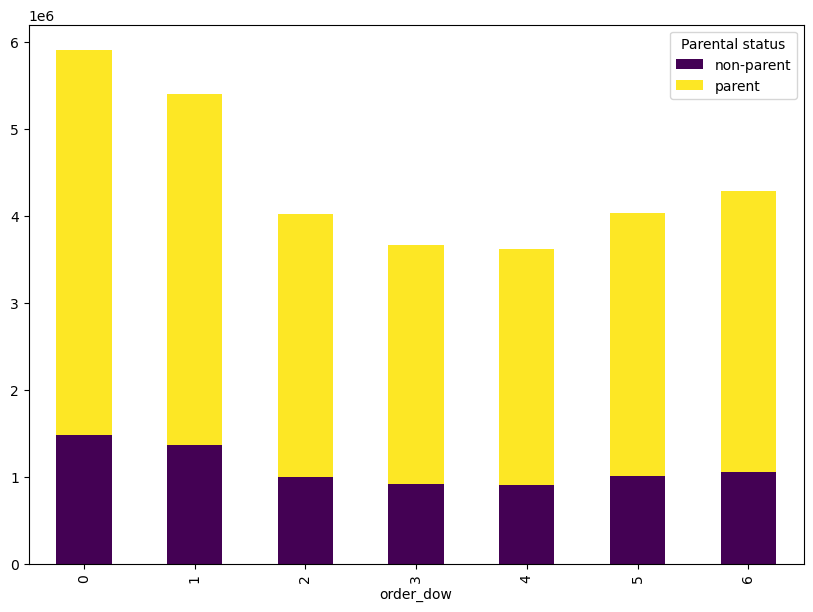

In [70]:
# Plotting
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

In [71]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_parents.png'))

In [72]:
# Count the number of orders by day of the week and age category
count_df = df_excluded.groupby(['order_dow', 'age_category']).size().unstack(fill_value=0)

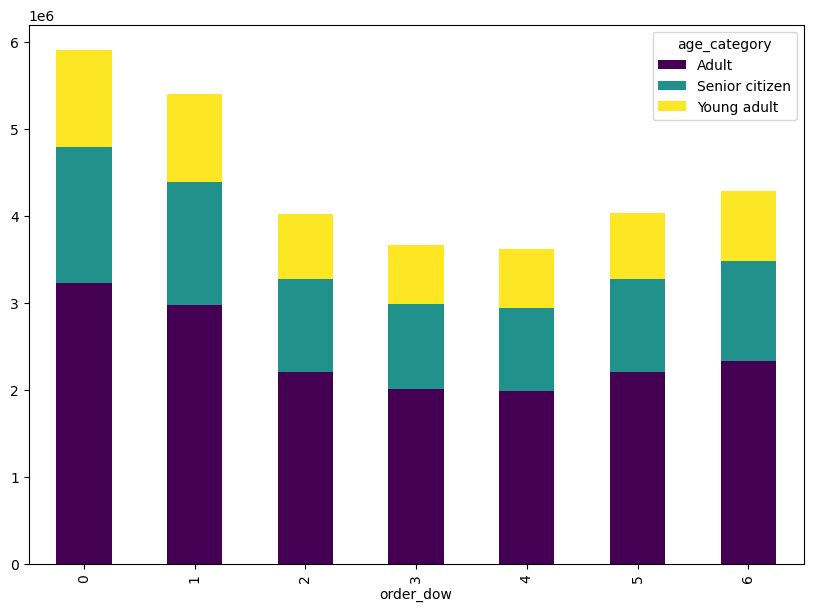

In [73]:
# Plotting
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

In [74]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age.png'))

<Axes: ylabel='count'>

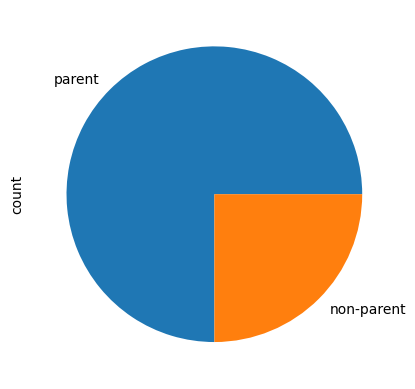

In [75]:
#create pie chart for parenthood
df_excluded['Parental status'].value_counts().plot.pie()

<Axes: ylabel='count'>

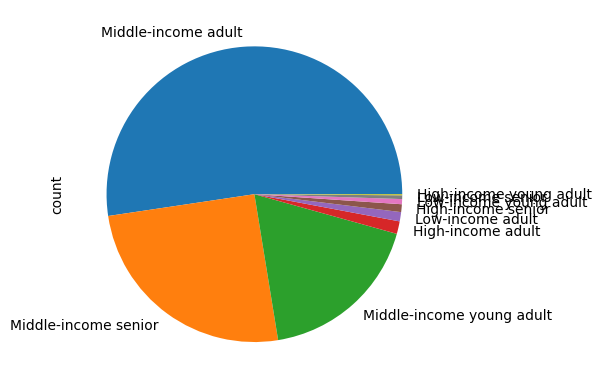

In [76]:
#create pie chart for age and income
df_excluded['Income by age'].value_counts().plot.pie()

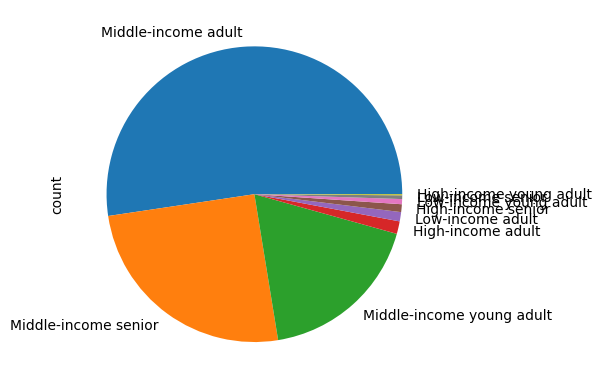

In [77]:
#export to file
pie_income_age = df_excluded['Income by age'].value_counts().plot.pie()

<Axes: xlabel='Income by age'>

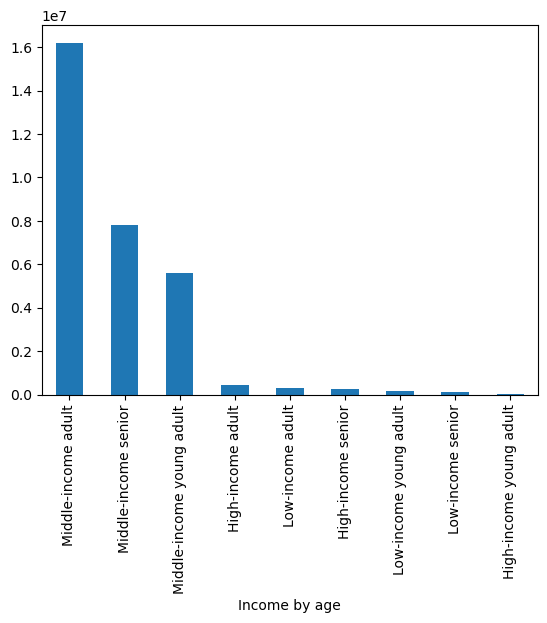

In [78]:
#create bar chart for readability
df_excluded['Income by age'].value_counts().plot.bar()

<Axes: xlabel='marital_income'>

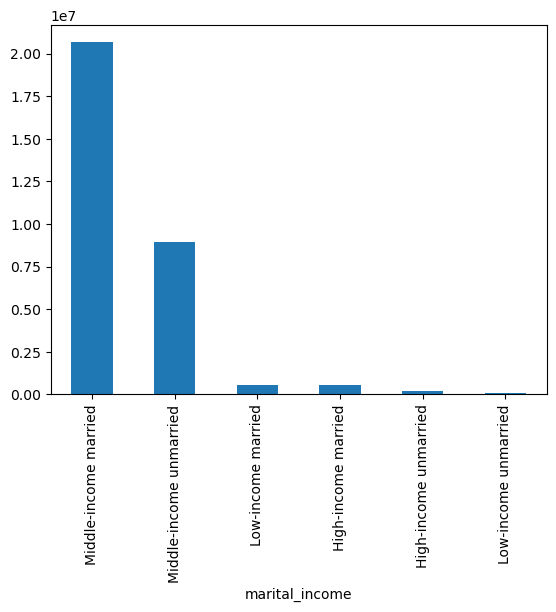

In [79]:
#create bar chart for marital income
df_excluded['marital_income'].value_counts().plot.bar()

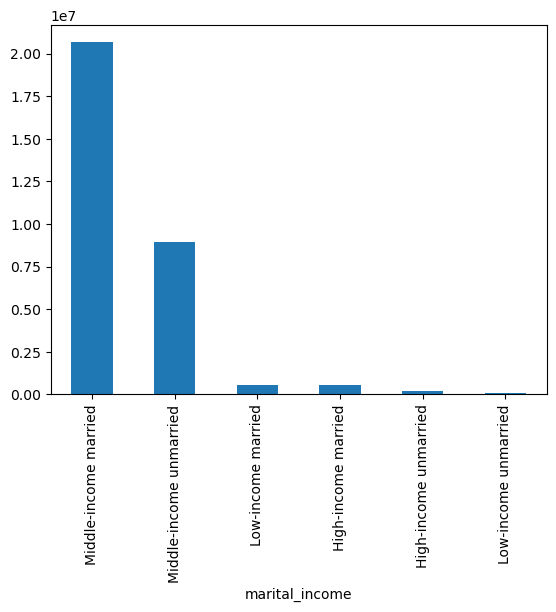

In [80]:
#export chart
bar_income_married = df_excluded['marital_income'].value_counts().plot.bar()

In [81]:
#export to file
bar_income_married.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_married.png'), bbox_inches = 'tight')

<Axes: ylabel='count'>

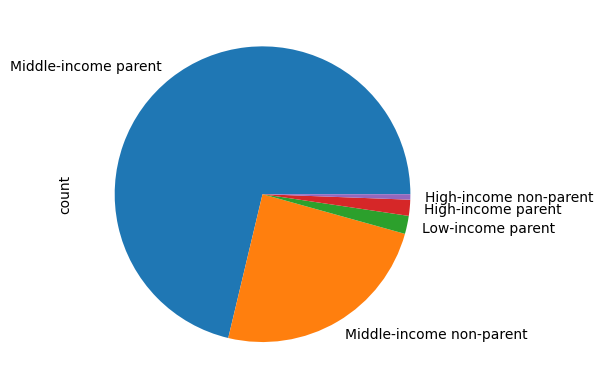

In [82]:
#create pie chart for family  income
df_excluded['Family income'].value_counts().plot.pie()

<Axes: ylabel='count'>

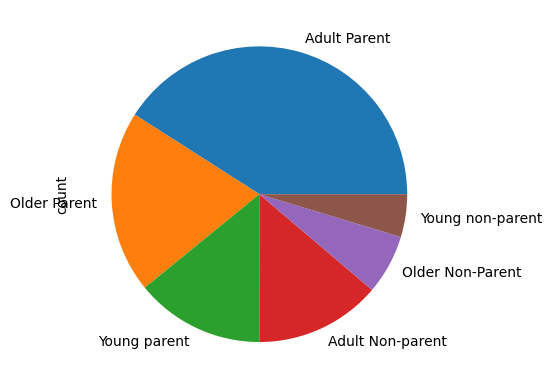

In [83]:
#create pie chart for age and parental status
df_excluded['parent_status_by_age'].value_counts().plot.pie()

<Axes: xlabel='parent_status_by_age'>

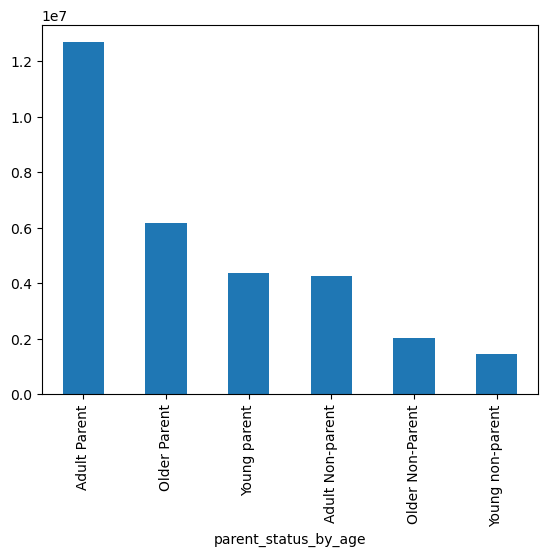

In [84]:
#create bar chart for age and parental status
df_excluded['parent_status_by_age'].value_counts().plot.bar()

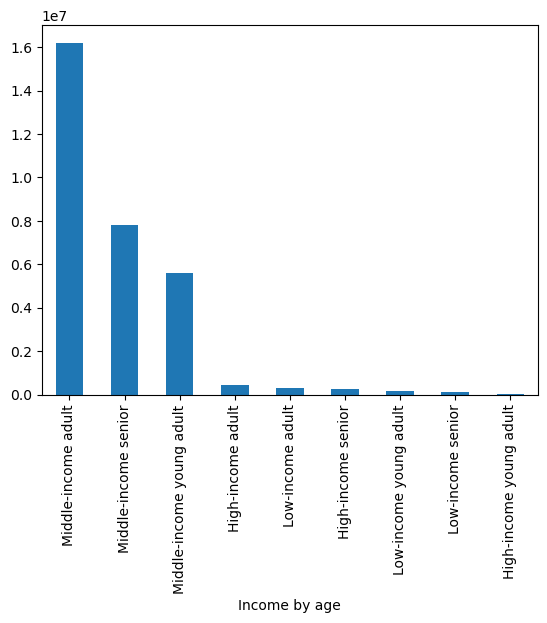

In [85]:
#export income by age bar chart
bar_income_age = df_excluded['Income by age'].value_counts().plot.bar()

In [86]:
#export to file
bar_income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_age.png'), bbox_inches = 'tight')

In [87]:
#export to file
bar_income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_age.png'), bbox_inches = 'tight')

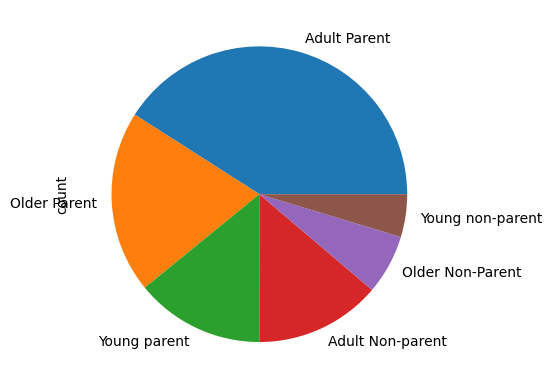

In [88]:
#create pie chart for age and parental status
pie_age_parent = df_excluded['parent_status_by_age'].value_counts().plot.pie()

In [89]:
#export to file
pie_age_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_parent.png'), bbox_inches = 'tight')

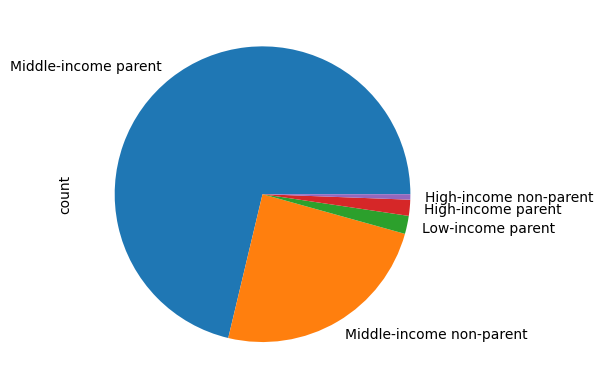

In [90]:
#save pie chart for family  income
pie_fam_income = df_excluded['Family income'].value_counts().plot.pie()

In [91]:
#export to file
pie_fam_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_fam_income.png'), bbox_inches = 'tight')

10 Identify Mean, Minimum, and Maximum for Aggregated Groups

In [93]:
#family status and income level
df_excluded.groupby('Family income').agg({'mean_spend': ['mean', 'min', 'max']})

mean_spend                        
                                mean       min           max
Family income                                               
High-income non-parent    116.247120  7.000575  15006.940000
High-income parent        117.815178  7.000000  10209.987755
Low-income parent           6.507587  1.262500      7.000000
Middle-income non-parent    9.571600  1.000000  14042.512281
Middle-income parent        9.419926  1.000000   5668.766038

In [94]:
#age and parental status
df_excluded.groupby('parent_status_by_age').agg({'mean_spend': ['mean', 'min', 'max']})

mean_spend                        
                           mean       min           max
parent_status_by_age                                   
Adult Non-parent      11.985561  1.000000  15006.940000
Adult Parent          11.907933  1.000000   6983.593023
Older Non-Parent      12.008598  1.308333  14042.512281
Older Parent          11.675617  1.262500   7414.485185
Young non-parent      12.579438  2.100000   8794.882427
Young parent          12.072566  1.628571  10209.987755

In [95]:
#age and parental status
df_excluded.groupby('Income by age').agg({'mean_spend': ['mean', 'min', 'max']})

mean_spend                         
                                 mean        min           max
Income by age                                                 
High-income adult          120.494176   7.000000  15006.940000
High-income senior          92.728682   7.000575   7414.485185
High-income young adult    257.038388  25.849554  10209.987755
Low-income adult             6.503674   1.568750      7.000000
Low-income senior            6.522295   1.262500      6.998925
Low-income young adult       6.503982   1.628571      7.000000
Middle-income adult          9.180590   1.000000   5271.136842
Middle-income senior         9.108941   1.300000  14042.512281
Middle-income young adult   10.749171   1.900000   8794.882427

11 Add Product Categories to Dataframe

In [97]:
#check path
path

'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis'

In [98]:
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [99]:
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [100]:
#rename numbered column
df_depts_id = df_departments.rename(columns={'Unnamed: 0': 'department_id'})

In [101]:
#check output
df_depts_id

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [102]:
#merge with current dataframe
df_with_depts = df_excluded.merge(df_depts_id, on = ['department_id'])

In [103]:
df_with_depts.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,activity_lev,married_yes_no,Parental status,income_level,age_category,parent_status_by_age,Family income,Income by age,marital_income,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,High activity,married,parent,Middle income,Adult,Adult Parent,Middle-income parent,Middle-income adult,Middle-income married,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,High activity,not married,parent,Low income,Young adult,Young parent,Low-income parent,Low-income young adult,Low-income unmarried,snacks


12 Visualize Product Type Orders by Demographic

In [105]:
# Count the number of orders by department and parental status
count_depts = df_with_depts.groupby(['department', 'Parental status']).size().unstack(fill_value=0)

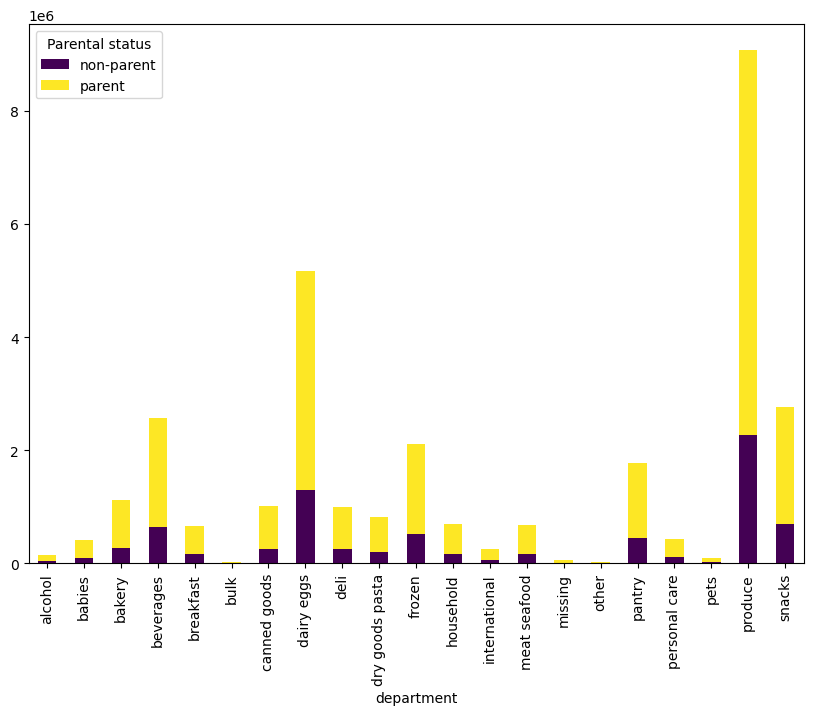

In [106]:
# Plotting
ax = count_depts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

In [107]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_dept_parents.png'),bbox_inches = 'tight')

In [108]:
#create similar chart for income level
count_depts_2 = df_with_depts.groupby(['department', 'income_level']).size().unstack(fill_value=0)

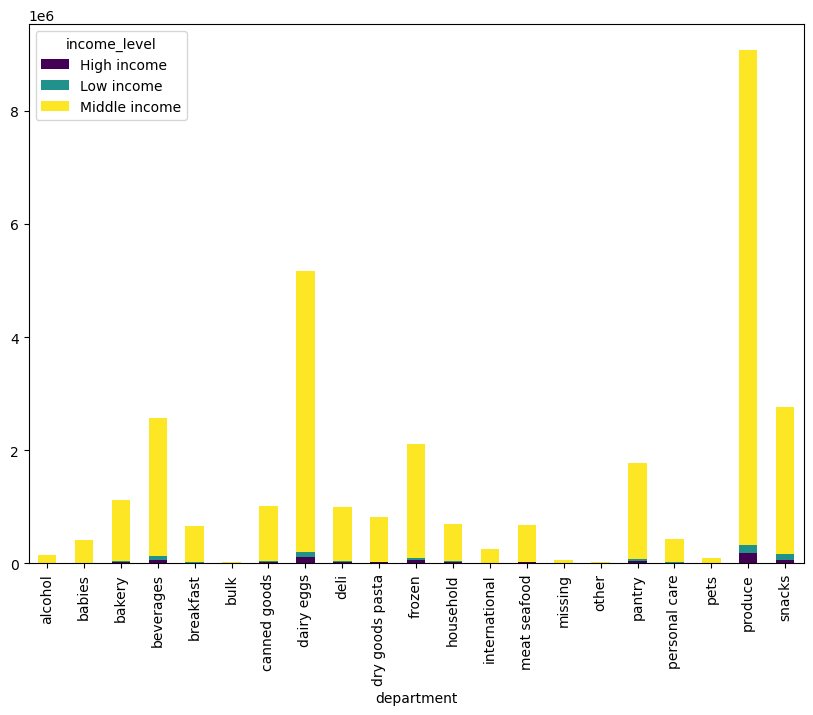

In [109]:
# Plotting
ax_income = count_depts_2.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

In [110]:
#export to file
ax_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_income_depts.png'),bbox_inches = 'tight')

In [111]:
# Count the number of orders by department and parental status
count_depts = df_with_depts.groupby(['department', 'Income by age']).size().unstack(fill_value=0)

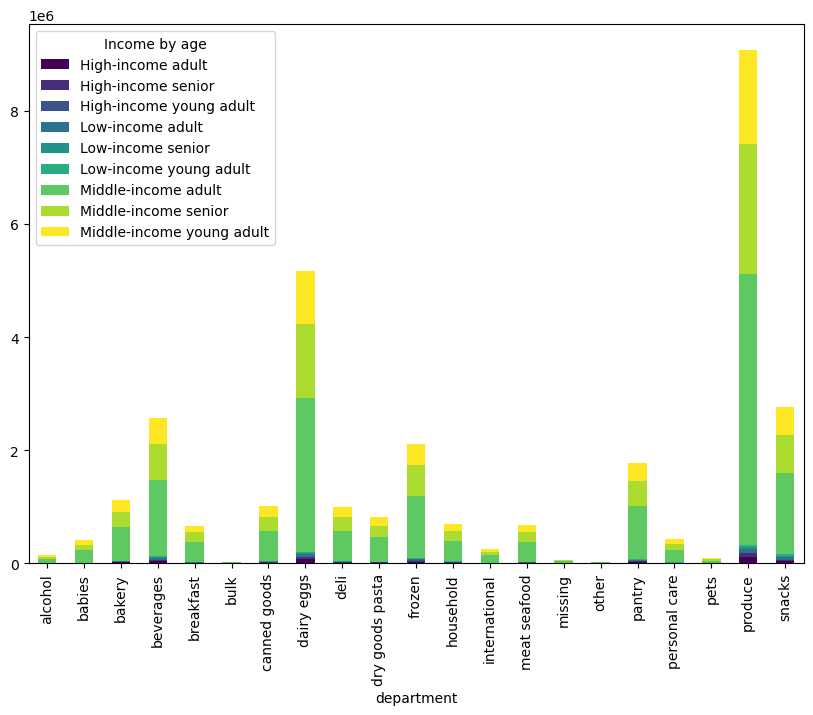

In [112]:
# Plotting
ax2 = count_depts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

13 Visualize Mean Spend per Department for Segmented Groups

In [117]:
#filter for low income only
low_income_df = df_with_depts[df_with_depts['income_level'] == 'Low income']

In [118]:
#find mean spend per dept
department_spend = low_income_df.groupby('department')['mean_spend'].sum()

<Axes: ylabel='mean_spend'>

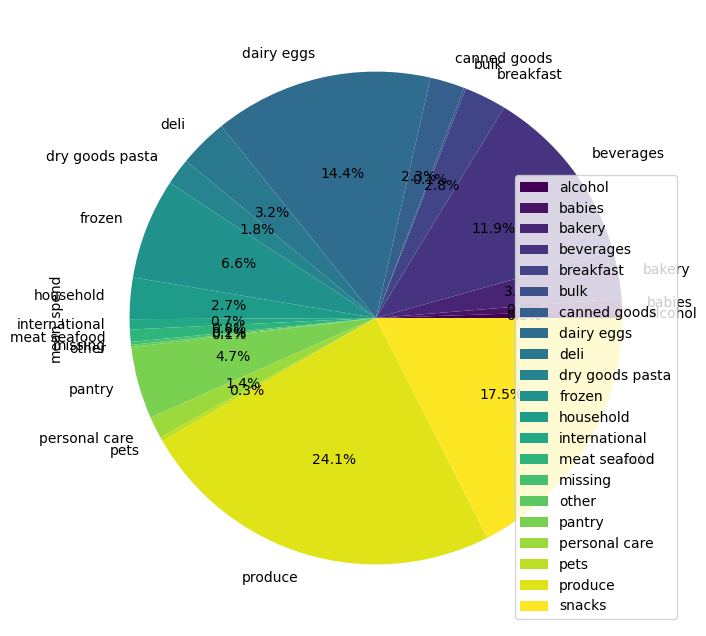

In [119]:
#create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
department_spend.plot.pie(autopct='%1.1f%%', ax=ax, colormap='viridis', legend=True)

In [120]:
#filter for high income only
high_income_df = df_with_depts[df_with_depts['income_level'] == 'High income']

In [121]:
#find mean spend per dept
department_spend = high_income_df.groupby('department')['mean_spend'].sum()

<Axes: ylabel='mean_spend'>

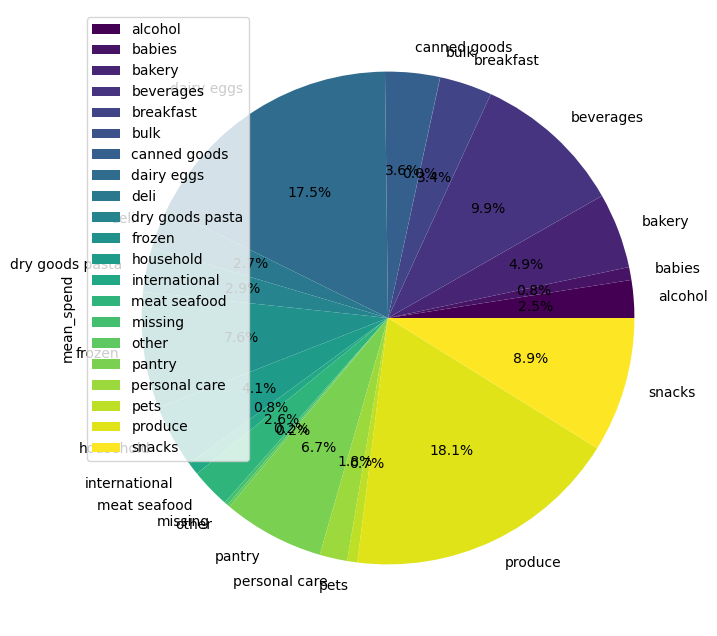

In [122]:
#create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
department_spend.plot.pie(autopct='%1.1f%%', ax=ax, colormap='viridis', legend=True)

14 Create Additional Visualizations for Key Questions

Q1: What are the busiest hours of the day?

<Axes: xlabel='order_hour_of_day'>

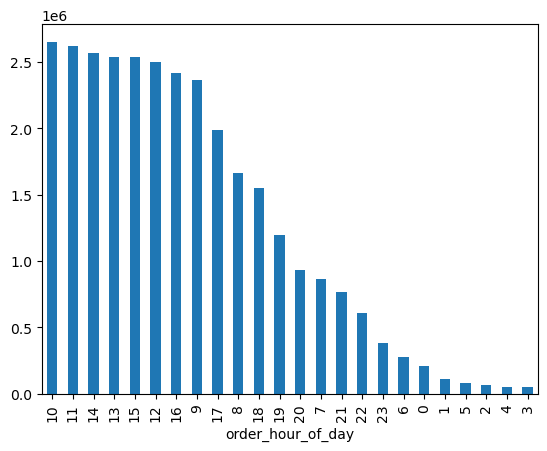

In [137]:
#create bar chart for age and parental status
df_excluded['order_hour_of_day'].value_counts().plot.bar()

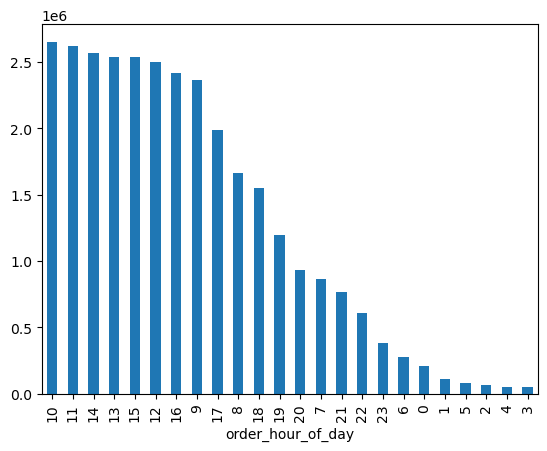

In [138]:
#export income by age bar chart
bar_hour_day = df_excluded['order_hour_of_day'].value_counts().plot.bar()

In [139]:
#export to file
bar_hour_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_day.png'))

KQ3: Price range by product

In [141]:
df_excluded['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

<Axes: ylabel='count'>

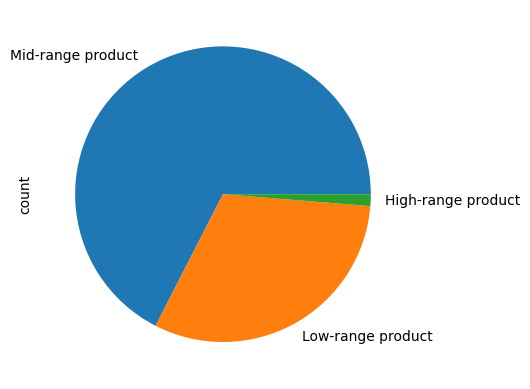

In [142]:
#create pie chart for range
df_excluded['price_range_loc'].value_counts().plot.pie()

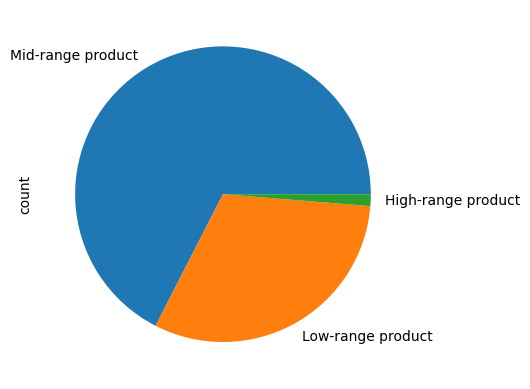

In [143]:
#export
price_range_pie = df_excluded['price_range_loc'].value_counts().plot.pie()

17 Export datasets

In [195]:
df_with_depts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_depts_final.pkl'))

In [196]:
df_with_depts.shape

(30964564, 41)

In [197]:
df_with_depts.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,activity_lev,married_yes_no,Parental status,income_level,age_category,parent_status_by_age,Family income,Income by age,marital_income,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,High activity,married,parent,Middle income,Adult,Adult Parent,Middle-income parent,Middle-income adult,Middle-income married,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,High activity,not married,parent,Low income,Young adult,Young parent,Low-income parent,Low-income young adult,Low-income unmarried,snacks
